In [1]:
import pandas, scipy, numpy
import matplotlib, matplotlib.pyplot

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

# read data

In [3]:
df1 = pandas.read_csv('/home/adrian/projects/scGBM/production1/adj.csv', index_col=False)
print(df1.shape)
df1.head()

(4918300, 3)


,TF,target,importance
0,RPS4X,RPS12,255.363938
1,RPS4X,RPL34,224.852101
2,RPS4X,RPL32,222.667963
3,RPS4X,RPS14,206.698889
4,RPS4X,RPS6,201.808905


In [4]:
df2 = pandas.read_csv('/home/adrian/projects/scGBM/production2/adj.csv', index_col=False)
print(df2.shape)
df2.head()

(4922968, 3)


,TF,target,importance
0,RPS4X,RPS23,218.710179
1,TBX21,NKG7,213.260183
2,RPS4X,RPS3A,209.023291
3,RPS4X,RPL32,200.424629
4,RPS4X,RPL30,194.003197


# find the intersect

In [5]:
%%time
# find the intersect
interactions1 = {}
interactions2 = {}
subset = int(df1.shape[0] * 0.1)
print('subset', subset)

for index in df1.index:
    label = df1.loc[index, 'TF'] + '_' + df1.loc[index, 'target']
    value = df1.loc[index, 'importance']
    interactions1[label] = value
    
interactions2 = {}
for index in df2.index:
    label = df2.loc[index, 'TF'] + '_' + df2.loc[index, 'target']
    value = df2.loc[index, 'importance']
    interactions2[label] = value

common_interactions = list(set(interactions1.keys()) & set(interactions2.keys()))
print(len(common_interactions))

x = []; y = []
for element in common_interactions:
    x.append(interactions1[element])
    y.append(interactions2[element])
    
print(x[:10])
print(y[:10])

subset 491830
2864665
[0.1914264407362365, 0.1592167607975432, 0.113940137311065, 0.2150171327380081, 0.26951506002343, 27.077503089925514, 0.104404544517007, 0.0359360072472915, 0.2445665150759091, 0.0982875226930337]
[0.3944961121635452, 0.1039369790218326, 0.0531870524232885, 0.4284712446311696, 2.547313381921005, 43.61617570942817, 0.0613758129148702, 0.0749757651474689, 0.2981052324944648, 0.1430765922738325]
CPU times: user 2min 14s, sys: 488 ms, total: 2min 14s
Wall time: 2min 14s


# associations

## lin

In [6]:
print(scipy.stats.pearsonr(x, y))
print(scipy.stats.spearmanr(x, y))
print(scipy.stats.kendalltau(x, y))

PearsonRResult(statistic=0.9602520144705267, pvalue=0.0)
SpearmanrResult(correlation=0.7565211922806153, pvalue=0.0)
KendalltauResult(correlation=0.5828366232082144, pvalue=0.0)


LinregressResult(slope=0.960745094134684, intercept=0.03950721523158773, rvalue=0.9602520144705223, pvalue=0.0, stderr=0.00016500598430226307, intercept_stderr=0.0005482337884180197)


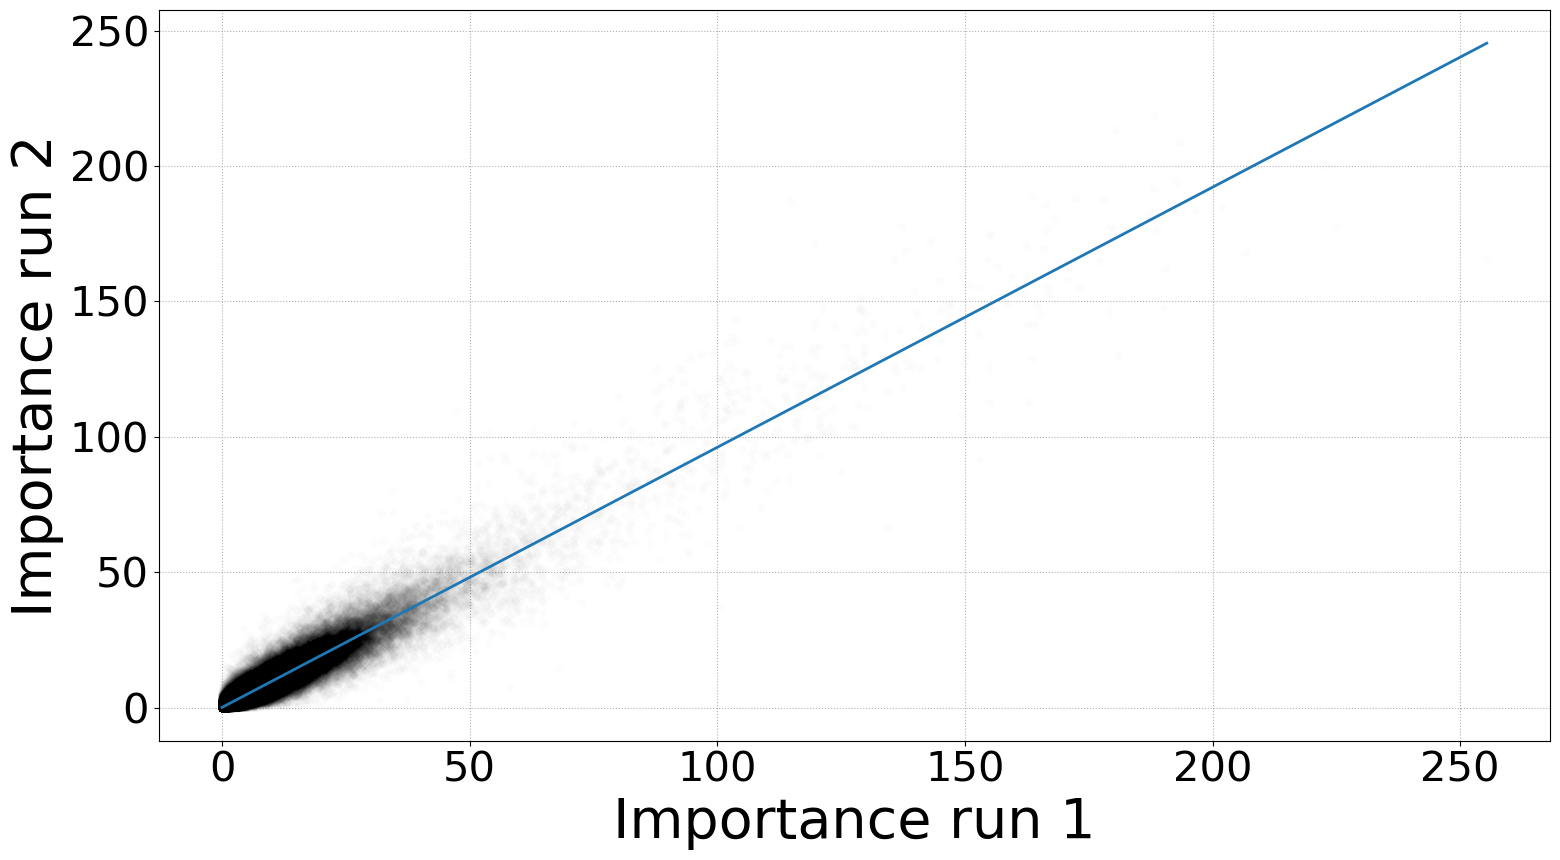

In [7]:
result = scipy.stats.linregress(x, y)
print(result)

floor = numpy.min(x); ceiling = numpy.max(x)
model_floor = result.slope*floor + result.intercept
model_ceiling = result.slope*ceiling + result.intercept

matplotlib.pyplot.plot(x, y, 'ok', alpha=1/100, mec='None')
matplotlib.pyplot.plot([floor, ceiling], [model_floor, model_ceiling], '-', lw=2, color='tab:blue')

matplotlib.pyplot.xlabel('Importance run 1')
matplotlib.pyplot.ylabel('Importance run 2')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()

## log

In [8]:
for i in range(len(x)):
    if x[i] < 2:
        x[i] = 2
for i in range(len(y)):
    if y[i] < 2:
        y[i] = 2

x = numpy.log2(x)
y = numpy.log2(y)

In [9]:
print(scipy.stats.pearsonr(x, y))
print(scipy.stats.spearmanr(x, y))
print(scipy.stats.kendalltau(x, y))

PearsonRResult(statistic=0.9483810982838077, pvalue=0.0)
SpearmanrResult(correlation=0.8324256177680834, pvalue=0.0)
KendalltauResult(correlation=0.8141398475653148, pvalue=0.0)


/home/adrian/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


LinregressResult(slope=0.948890327636635, intercept=0.05751893449021073, rvalue=0.9483810982836853, pvalue=0.0, stderr=0.00018747255337341566, intercept_stderr=0.00022959820030568555)


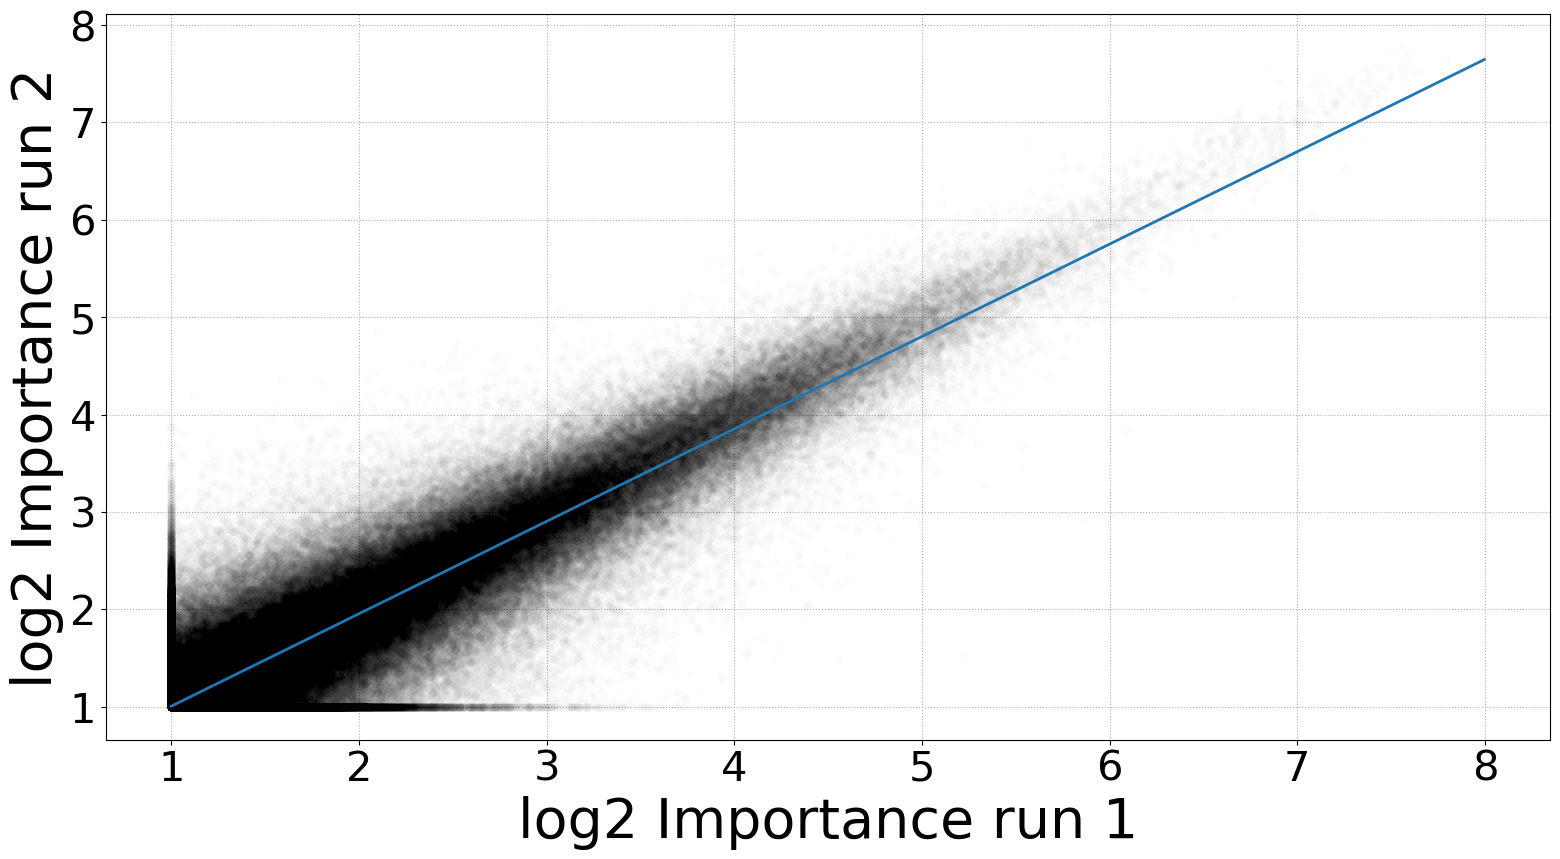

In [10]:
result = scipy.stats.linregress(x, y)
print(result)

floor = numpy.min(x); ceiling = numpy.max(x)
model_floor = result.slope*floor + result.intercept
model_ceiling = result.slope*ceiling + result.intercept

matplotlib.pyplot.plot(x, y, 'ok', alpha=1/100, mec='None')
matplotlib.pyplot.plot([floor, ceiling], [model_floor, model_ceiling], '-', lw=2, color='tab:blue')

matplotlib.pyplot.xlabel('log2 Importance run 1')
matplotlib.pyplot.ylabel('log2 Importance run 2')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()